In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("BostonHousing.csv")

In [4]:
df.shape

(506, 14)

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [8]:
df.isnull().sum(axis=0)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
cor= df.iloc[:,:13].corr()
cor

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


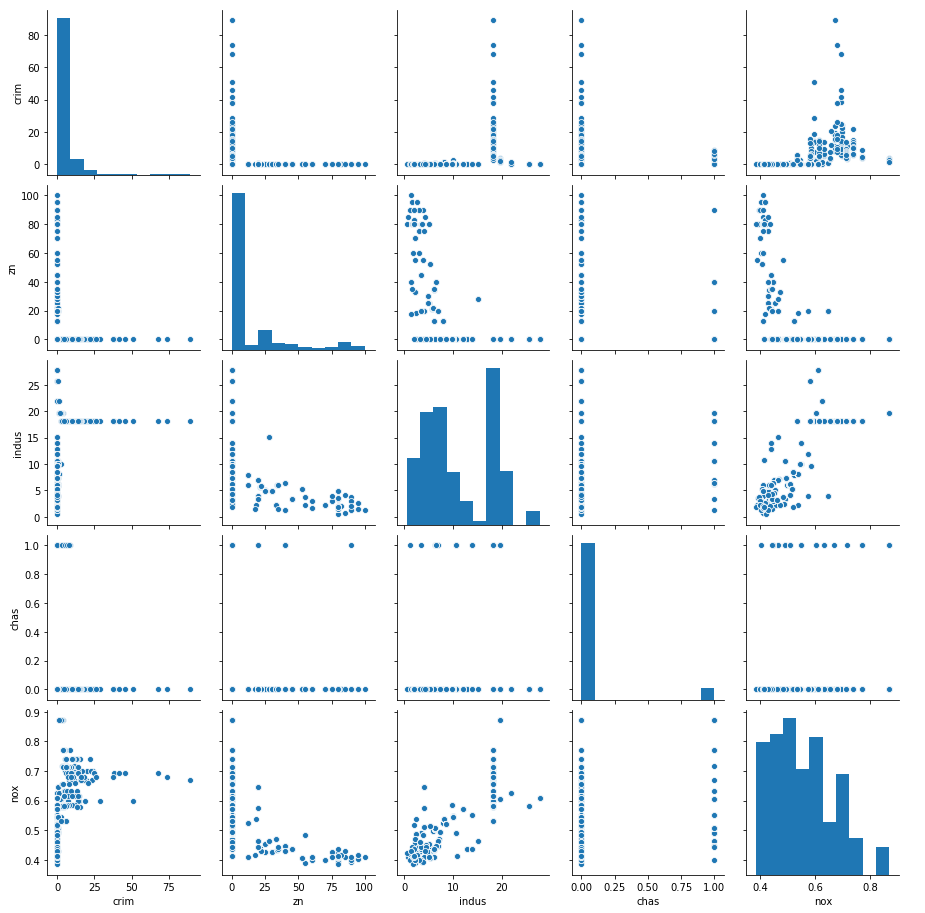

In [13]:
sns.pairplot(df.iloc[:,:5])

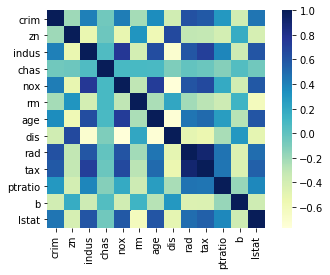

In [12]:
sns.heatmap(cor,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

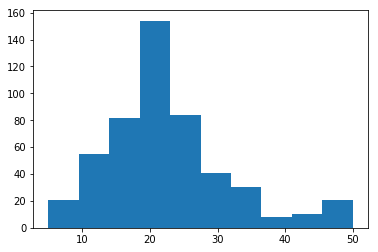

In [59]:
plt.hist(df['medv'])

In [61]:
df['logmedv'] = np.log(df['medv'])

In [62]:
#df.head()

(array([  3.,   8.,  13.,  23.,  63., 100., 172.,  52.,  40.,  32.]),
 array([1.60943791, 1.83969642, 2.06995493, 2.30021344, 2.53047195,
        2.76073046, 2.99098897, 3.22124748, 3.45150599, 3.6817645 ,
        3.91202301]),
 <a list of 10 Patch objects>)

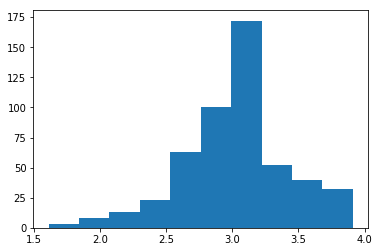

In [63]:
plt.hist(df.logmedv)

In [ ]:
df['sqrtmedv'] = np.sqrt(df['medv'])

In [ ]:
plt.hist(df.sqrtmedv)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
df.shape

(506, 15)

In [118]:
df1 = df.iloc[:,:13]

In [101]:
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [120]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns

In [121]:
vif

,VIF,Features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [119]:
df1.drop(['ptratio','nox','rm','tax','b','age'],axis=1, inplace=True)

In [122]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [123]:
df1.corr()

,crim,zn,indus,chas,dis,rad,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,-0.379670,0.625505,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,0.664408,-0.311948,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,-0.708027,0.595129,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,-0.099176,-0.007368,-0.053929
dis,-0.379670,0.664408,-0.708027,-0.099176,1.000000,-0.494588,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,-0.494588,1.000000,0.488676
lstat,0.455621,-0.412995,0.603800,-0.053929,-0.496996,0.488676,1.000000


In [138]:
x = df1  ### Features
#y = df.medv  ### Labels
#y = df.medv
y1 = df.logmedv

In [139]:
x

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,2.4786,1,9.67
502,0.04527,0.0,11.93,0,2.2875,1,9.08
503,0.06076,0.0,11.93,0,2.1675,1,5.64
504,0.10959,0.0,11.93,0,2.3889,1,6.48


In [140]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y1, test_size = 0.2,random_state=5)

In [143]:
df1.shape

(506, 7)

In [144]:
x_train.head()

,crim,zn,indus,chas,dis,rad,lstat
33,1.15172,0.0,8.14,0,3.7872,4,18.35
283,0.01501,90.0,1.21,1,5.8850,1,3.16
418,73.53410,0.0,18.10,0,1.8026,24,20.62
502,0.04527,0.0,11.93,0,2.2875,1,9.08
402,9.59571,0.0,18.10,0,1.6390,24,20.31


In [145]:
x_test.shape

(102, 7)

In [146]:
y_train

33     2.572612
283    3.912023
418    2.174752
502    3.025291
402    2.493205
         ...   
486    2.949688
189    3.552487
495    3.139833
206    3.194583
355    3.025291
Name: logmedv, Length: 404, dtype: float64

In [147]:
lr = LinearRegression().fit(x_train,y_train)

In [148]:
lr.intercept_

3.853230717014158

In [149]:
lr.coef_

array([-0.01094488,  0.00259849, -0.00966823,  0.14448731, -0.055813  ,
       -0.00021995, -0.03970619])

In [150]:
df1.columns

Index(['crim', 'zn', 'indus', 'chas', 'dis', 'rad', 'lstat'], dtype='object')

In [151]:
lr.score(x_test,y_test) # Coeffecient of determination - R^2

0.6738404287978711

In [185]:
lr.score(x_train,y_train)

0.7374931194517177

In [39]:
pred = lr.predict(x_test)

In [44]:
#pred

In [45]:
#y_test

In [42]:
x_test['pred'] = pred
x_test['actual'] = y_test

c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shivu\anaconda3\envs\tensorflow1.5\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
x_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,pred,actual
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.563118,37.6
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70,32.144451,27.9
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,27.065736,22.6
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,5.670806,13.8
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58,35.099826,35.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,21.912956,26.6
212,0.21719,0.0,10.59,1,0.489,5.807,53.8,3.6526,4,277,18.6,390.94,16.03,22.394774,22.4
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.193354,13.1
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,23.969911,23.0


In [ ]:
y_test

In [46]:
from sklearn import metrics
print ("MSE", metrics.mean_squared_error(y_test,pred))
print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred)))

MSE 20.869292183770455
RMSE 4.5682920423031685


In [ ]:
#x_train, x_test, y_train, y_test =train_test_split(x,y1, test_size = 0.2,random_state=4)

In [ ]:
#lr1 = LinearRegression().fit(x_train,y_train)

In [ ]:
#lr1.coef_

In [ ]:
#lr1.intercept_

In [ ]:
#lr1.score(x_test,y_test)

In [ ]:
#pred1 = lr1.predict(x_test)
#pred2= np.exp(pred1)

In [ ]:
#y_test

In [ ]:
#pred2

In [ ]:
# pred1 = lr1.predict(x_test)
# print ("MSE", metrics.mean_squared_error(y_test,pred2))
# print ("RMSE", np.sqrt(metrics.mean_squared_error(y_test, pred2)))

### Using StatsModel API

In [48]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm

In [152]:
#df1.drop(['ptratio','nox','tax','rm','age','b'],axis=1, inplace=True)
df1.head()

,crim,zn,indus,chas,dis,rad,lstat
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33


In [153]:
df1['logmedv'] = np.log(df.medv)

In [176]:
df1.head()

,crim,zn,indus,chas,dis,rad,lstat,logmedv
0,0.00632,18.0,2.31,0,4.0900,1,4.98,3.178054
1,0.02731,0.0,7.07,0,4.9671,2,9.14,3.072693
2,0.02729,0.0,7.07,0,4.9671,2,4.03,3.546740
3,0.03237,0.0,2.18,0,6.0622,3,2.94,3.508556
4,0.06905,0.0,2.18,0,6.0622,3,5.33,3.589059


In [177]:
model = smf.ols("logmedv ~ crim+zn+indus+chas+dis+lstat", data=df1)
model_fit = model.fit()

In [178]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logmedv   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     220.2
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          9.88e-137
Time:                        09:54:44   Log-Likelihood:                 62.615
No. Observations:                 506   AIC:                            -111.2
Df Residuals:                     499   BIC:                            -81.65
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8518      0.047     82.039      0.000       3.760       3.944
crim          -0.0106      0.001     -8.183      0.000      -0.013      -0.008
zn             0.0024      0.001      4.347      0.000       0.001       0.004
indus         -0.0106      0.002     -4.823      0.000      -0.015      -0.006
chas           0.1581      0.038      4.125      0.000       0.083       0.233
dis           -0.0555      0.007     -7.403      0.000      -0.070      -0.041
lstat         -0.0387      0.002    -21.654      0.000      -0.042      -0.035
==============================================================================
Omnibus:                       34.704   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.109
Skew:                           0.443   Prob(JB):                     1.98e-14
Kurtosis:                       4.486   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

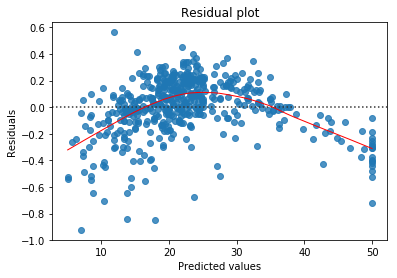

In [180]:
import seaborn as sns
# seaborn residual plot
sns.residplot(df['medv'],model_fitted_y, lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

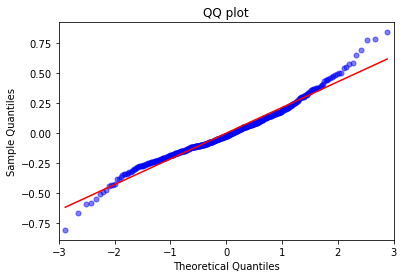

In [181]:
# statsmodels Q-Q plot on model residuals
QQ = ProbPlot(model_residuals)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

(array([  2.,   5.,  16.,  87., 179., 136.,  48.,  24.,   5.,   4.]),
 array([-0.80499986, -0.64057814, -0.47615642, -0.3117347 , -0.14731298,
         0.01710874,  0.18153046,  0.34595218,  0.5103739 ,  0.67479562,
         0.83921734]),
 <a list of 10 Patch objects>)

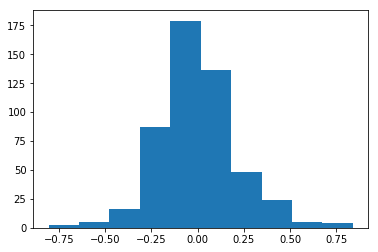

In [182]:
plt.hist(model_residuals)

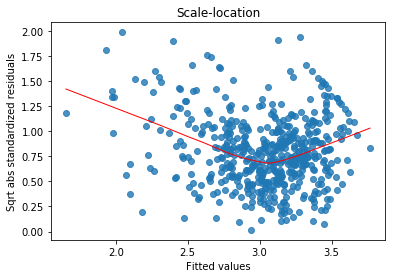

In [183]:
# plot scale-location
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlabel('Fitted values')
plt.ylabel('Sqrt abs standardized residuals')
plt.title('Scale-location');

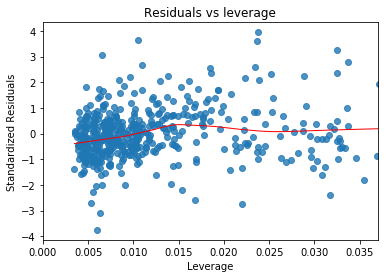

In [184]:
# plot residuals vs high leverage points
sns.regplot(model_leverage, model_norm_residuals, lowess=True, line_kws={'color':'r', 'lw':1})
plt.xlim(xmin=0, xmax=0.037)
plt.xlabel('Leverage')
plt.ylabel("Standardized Residuals")
plt.title("Residuals vs leverage");

### Additional links

Links to study
https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Power Transformation / Box -cox Transformation
https://www.google.com/search?sxsrf=ALeKk00ISEIVgSj-IxS7yKT2qJGNyXzxhA%3A1602436462648&ei=bj2DX8ugJ9mE4-EP2sqxuA0&q=box+cox+transformation+&oq=box+cox+transformation+&gs_lcp=CgZwc3ktYWIQAzIECCMQJzIHCAAQyQMQQzICCAAyBAgAEEMyBAgAEEMyAggAMgQIABBDMgQIABBDMgQIABBDMgIIADoHCAAQRxCwA1CRIViRIWCVI2gBcAB4AIABlwGIAZcBkgEDMC4xmAEAoAEBqgEHZ3dzLXdpesgBCMABAQ&sclient=psy-ab&ved=0ahUKEwjLj4aBha3sAhVZwjgGHVplDNcQ4dUDCA0&uact=5


Assumption of LR
https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/#:~:text=Let's%20look%20at%20the%20important,predictor)%20variable(s).&text=The%20independent%20variables%20should%20not,phenomenon%20is%20known%20as%20multicollinearity

Diagnostic Plots
http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/
Stat 501
https://online.stat.psu.edu/stat501/

Lasso, Ridge and Elastic Net

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

Subset  regression  + Stepwise Regression

https://statisticsbyjim.com/regression/guide-stepwise-best-subsets-regression/

Regression by Example
http://3.droppdf.com/files/pjxkI/regression-analysis-by-example-5th-edition.pdf